In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df = pd.read_csv("Descriptive_Analysis_Dataset_100.csv")


In [ ]:
df


,Transaction ID,Customer ID,Purchase Date,Product Category,Quantity,Price,Payment Method,Location
0,1,4913,2023-11-03 00:00:00,Groceries,12,144.57,Digital Payment,Store A
1,2,7929,2023-08-19 00:00:00,Home & Kitchen,18,149.03,Digital Payment,Store C
2,3,8361,2023-01-24 00:00:00,Electronics,13,404.75,Cash,Store C
3,4,5656,2023-03-19 00:00:00,Groceries,1,141.95,Cash,Store C
4,5,2790,2023-12-07 00:00:00,Electronics,11,38.18,Cash,Store C
...,...,...,...,...,...,...,...,...
95,96,9593,2023-09-25 00:00:00,Electronics,14,86.61,Cash,Store D
96,97,7490,2023-09-23 00:00:00,Groceries,8,482.64,Cash,Store B
97,98,2623,2023-10-28 00:00:00,Groceries,17,271.55,Credit Card,Store D
98,99,9947,2023-03-27 00:00:00,Electronics,18,35.19,Credit Card,Store A


In [ ]:
df.head()


,Transaction ID,Customer ID,Purchase Date,Product Category,Quantity,Price,Payment Method,Location
0,1,4913,2023-11-03 00:00:00,Groceries,12,144.57,Digital Payment,Store A
1,2,7929,2023-08-19 00:00:00,Home & Kitchen,18,149.03,Digital Payment,Store C
2,3,8361,2023-01-24 00:00:00,Electronics,13,404.75,Cash,Store C
3,4,5656,2023-03-19 00:00:00,Groceries,1,141.95,Cash,Store C
4,5,2790,2023-12-07 00:00:00,Electronics,11,38.18,Cash,Store C


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    100 non-null    int64  
 1   Customer ID       100 non-null    int64  
 2   Purchase Date     100 non-null    object 
 3   Product Category  100 non-null    object 
 4   Quantity          100 non-null    int64  
 5   Price             100 non-null    float64
 6   Payment Method    100 non-null    object 
 7   Location          100 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


No Null Values in Desciptive dataset so do not need to clean dataset

In [ ]:
print(df.isnull().sum())


Transaction ID      0
Customer ID         0
Purchase Date       0
Product Category    0
Quantity            0
Price               0
Payment Method      0
Location            0
dtype: int64


In [ ]:
df = df.drop_duplicates()



I changed the pattern of the year-month-date

In [ ]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])


In [ ]:
df


,Transaction ID,Customer ID,Purchase Date,Product Category,Quantity,Price,Payment Method,Location
0,1,4913,2023-11-03,Groceries,12,144.57,Digital Payment,Store A
1,2,7929,2023-08-19,Home & Kitchen,18,149.03,Digital Payment,Store C
2,3,8361,2023-01-24,Electronics,13,404.75,Cash,Store C
3,4,5656,2023-03-19,Groceries,1,141.95,Cash,Store C
4,5,2790,2023-12-07,Electronics,11,38.18,Cash,Store C
...,...,...,...,...,...,...,...,...
95,96,9593,2023-09-25,Electronics,14,86.61,Cash,Store D
96,97,7490,2023-09-23,Groceries,8,482.64,Cash,Store B
97,98,2623,2023-10-28,Groceries,17,271.55,Credit Card,Store D
98,99,9947,2023-03-27,Electronics,18,35.19,Credit Card,Store A


Total sales and average transaction value:

In [ ]:
df['Total Sales'] = df['Quantity'] * df['Price']
total_sales = df['Total Sales'].sum()
average_transaction_value = df['Total Sales'].mean()


In [ ]:
print(f"Total Sales: {total_sales}")
print(f"Average Transaction Value: {average_transaction_value}")


Total Sales: 282547.33999999997
Average Transaction Value: 2825.4734


Number of transaction values per month:

In [ ]:
df['Month'] = df['Purchase Date'].dt.month
transactions_per_month = df.groupby('Month')['Transaction ID'].count()


In [ ]:
print(f"Number of Transactions per Month:\n{transactions_per_month}")


Number of Transactions per Month:
Month
1     10
2      9
3      8
4      7
5      9
6      8
7      9
8      8
9      7
10     8
11     8
12     9
Name: Transaction ID, dtype: int64


Distribution of purchases by product category:

In [ ]:
purchases_by_category = df['Product Category'].value_counts()


In [ ]:
print(f"Distribution of Purchases by Product Category:\n{purchases_by_category}")


Distribution of Purchases by Product Category:
Product Category
Books             27
Electronics       23
Home & Kitchen    18
Clothing          17
Groceries         15
Name: count, dtype: int64


Average Quantity Purchased per transaction:

In [ ]:
average_quantity_per_transaction = df['Quantity'].mean()


In [ ]:
print(f"Average Quantity Purchased per Transaction: {average_quantity_per_transaction}")


Average Quantity Purchased per Transaction: 11.33


Data Visualization: Bar chart, Histrogram, pie, and heat map

Monthly sales trends over the year:

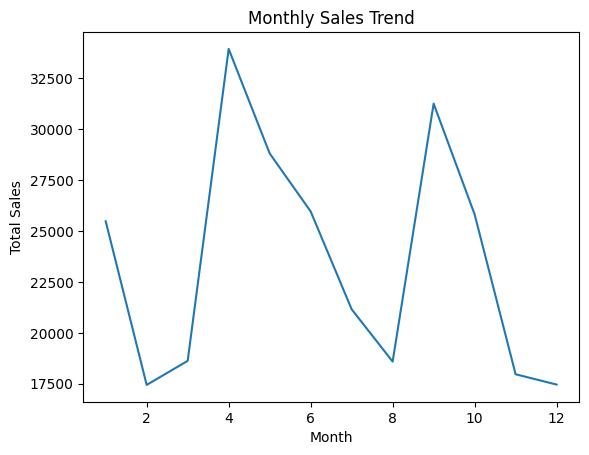

In [ ]:
monthly_sales = df.groupby('Month')['Total Sales'].sum()
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


Bar chart for the most popular product category in it:

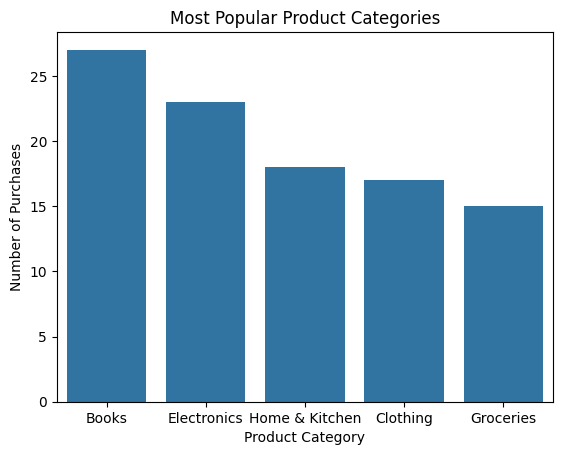

In [ ]:
sns.barplot(x=purchases_by_category.index, y=purchases_by_category.values)
plt.title("Most Popular Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Number of Purchases")
plt.show()


Pie Chart for the share of different payment methods.

In [ ]:
# Hide the ylabel for clarity

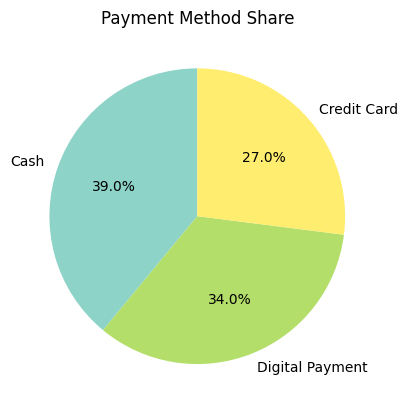

In [ ]:
payment_method_share = df['Payment Method'].value_counts()
payment_method_share.plot.pie(autopct='%1.1f%%', startangle=90, cmap="Set3")
plt.title("Payment Method Share")
plt.ylabel("")
plt.show()


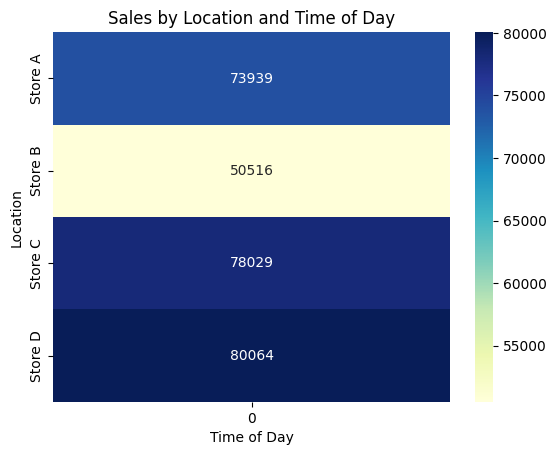

In [ ]:
#Creating a new column for time of day
df['Time of Day'] = df['Purchase Date'].dt.hour
location_sales = df.groupby(['Location', 'Time of Day'])['Total Sales'].sum().unstack()

# Heatmap visualization
sns.heatmap(location_sales, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title("Sales by Location and Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Location")
plt.show()


# Calculate the frequency of purchases per customer

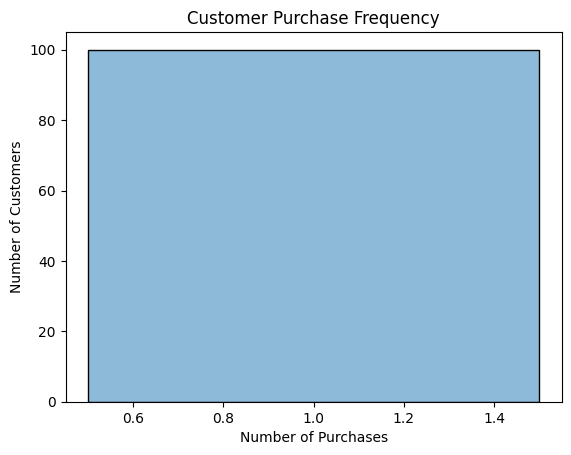

In [ ]:
# Calculate the frequency of purchases per customer
customer_frequency = df.groupby('Customer ID')['Transaction ID'].count()

# Define high-frequency and low-frequency customers (e.g., > 5 purchases = high-frequency)
high_frequency_customers = customer_frequency[customer_frequency > 5]
low_frequency_customers = customer_frequency[customer_frequency <= 5]

# Visualizing the segmentation
sns.histplot(customer_frequency, kde=True)
plt.title("Customer Purchase Frequency")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.show()

# Purchasing patterns of high-frequency customers
high_freq_data = df[df['Customer ID'].isin(high_frequency_customers.index)]
low_freq_data = df[df['Customer ID'].isin(low_frequency_customers.index)]


#peak shopping period

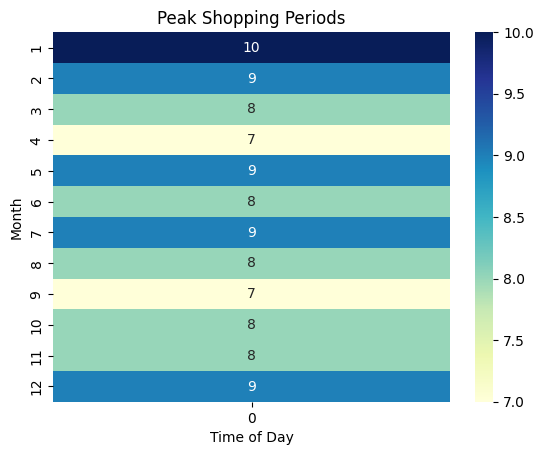

In [ ]:

peak_shopping_periods = df.groupby(['Month', 'Time of Day']).size().unstack()
sns.heatmap(peak_shopping_periods, cmap="YlGnBu", annot=True)
plt.title("Peak Shopping Periods")
plt.xlabel("Time of Day")
plt.ylabel("Month")
plt.show()
